In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(42)

In [4]:
def generate_linear_data(n_samples=100):
    X = np.random.uniform(-10, 10, size=(n_samples, 1))
    noise = np.random.normal(0, 5, size=(n_samples, 1))
    y = 2 * X + noise
    return X, y.ravel()

# Function to generate nonlinear dataset
def generate_nonlinear_data(n_samples=100):
    X = np.random.uniform(-10, 10, size=(n_samples, 1))
    noise = np.random.normal(0, 10, size=(n_samples, 1))
    y = X**2 + noise
    return X, y.ravel()


In [5]:
X_linear, y_linear = generate_linear_data()
X_nonlinear, y_nonlinear = generate_nonlinear_data()


In [6]:
df_linear = pd.DataFrame({
    'X': X_linear.ravel(),
    'y': y_linear
})

df_nonlinear = pd.DataFrame({
    'X': X_nonlinear.ravel(),
    'y': y_nonlinear
})


In [7]:
# Displaying the first few samples of each dataset
print("Linear Dataset Sample:")
print(df_linear.head())

print("\nNonlinear Dataset Sample:")
print(df_nonlinear.head())

Linear Dataset Sample:
          X          y
0 -2.509198  -4.583160
1  9.014286  16.533536
2  4.639879   9.738562
3  1.973170  -5.991505
4 -6.879627 -14.857614

Nonlinear Dataset Sample:
          X          y
0  5.896226  47.434593
1  0.052742  -7.073913
2  1.538078   6.803877
3 -0.149646   7.768734
4 -6.095140  27.881430


In [8]:
# Function to split data
def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Splitting linear dataset
X_train_linear, X_test_linear, y_train_linear, y_test_linear = split_data(X_linear, y_linear)

# Splitting nonlinear dataset
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = split_data(X_nonlinear, y_nonlinear)


In [9]:
sns.set(style="whitegrid")


In [10]:
# Function to create and tune KNN Regressor
def create_knn_model(X_train, y_train):
    knn = KNeighborsRegressor()
    param_grid = {'n_neighbors': list(range(1, 21))}
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Optimal number of neighbors: {grid_search.best_params_['n_neighbors']}")
    return grid_search.best_estimator_


In [11]:
# Function to create and tune Decision Tree Regressor
def create_dt_model(X_train, y_train):
    dt = DecisionTreeRegressor(random_state=42)
    param_grid = {'max_depth': list(range(1, 11))}
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Optimal max_depth: {grid_search.best_params_['max_depth']}")
    return grid_search.best_estimator_


In [12]:
# Function to train models
def train_models(X_train, y_train):
    # Linear Regression
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    # KNN Regressor with optimal k
    knn = create_knn_model(X_train, y_train)
    
    # Decision Tree Regressor with optimal max_depth
    dt = create_dt_model(X_train, y_train)
    
    return linear, knn, dt


In [13]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, dataset_type=''):
    metrics = {}
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculating metrics for training set
    metrics['Train_MAE'] = mean_absolute_error(y_train, y_pred_train)
    metrics['Train_MSE'] = mean_squared_error(y_train, y_pred_train)
    metrics['Train_R2'] = r2_score(y_train, y_pred_train)
    
    # Calculating metrics for test set
    metrics['Test_MAE'] = mean_absolute_error(y_test, y_pred_test)
    metrics['Test_MSE'] = mean_squared_error(y_test, y_pred_test)
    metrics['Test_R2'] = r2_score(y_test, y_pred_test)
    
    print(f"\nEvaluation Metrics for {dataset_type} Dataset:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    
    return y_pred_test


In [14]:
# Training models on Linear Dataset
print("Training on Linear Dataset:")
linear_linear, knn_linear, dt_linear = train_models(X_train_linear, y_train_linear)

# Evaluating models on Linear Dataset
y_pred_linear_linear = evaluate_model(linear_linear, X_train_linear, y_train_linear, X_test_linear, y_test_linear, 'Linear - Linear Regressor')
y_pred_knn_linear = evaluate_model(knn_linear, X_train_linear, y_train_linear, X_test_linear, y_test_linear, 'Linear - KNN Regressor')
y_pred_dt_linear = evaluate_model(dt_linear, X_train_linear, y_train_linear, X_test_linear, y_test_linear, 'Linear - Decision Tree Regressor')

# Training models on Nonlinear Dataset
print("\nTraining on Nonlinear Dataset:")
linear_nonlinear, knn_nonlinear, dt_nonlinear = train_models(X_train_nonlinear, y_train_nonlinear)

# Evaluating models on Nonlinear Dataset
y_pred_linear_nonlinear = evaluate_model(linear_nonlinear, X_train_nonlinear, y_train_nonlinear, X_test_nonlinear, y_test_nonlinear, 'Nonlinear - Linear Regressor')
y_pred_knn_nonlinear = evaluate_model(knn_nonlinear, X_train_nonlinear, y_train_nonlinear, X_test_nonlinear, y_test_nonlinear, 'Nonlinear - KNN Regressor')
y_pred_dt_nonlinear = evaluate_model(dt_nonlinear, X_train_nonlinear, y_train_nonlinear, X_test_nonlinear, y_test_nonlinear, 'Nonlinear - Decision Tree Regressor')


Training on Linear Dataset:
Optimal number of neighbors: 9
Optimal max_depth: 3

Evaluation Metrics for Linear - Linear Regressor Dataset:
Train_MAE: 3.6736
Train_MSE: 21.1920
Train_R2: 0.8524
Test_MAE: 2.9567
Test_MSE: 16.3425
Test_R2: 0.8889

Evaluation Metrics for Linear - KNN Regressor Dataset:
Train_MAE: 3.5455
Train_MSE: 19.5964
Train_R2: 0.8636
Test_MAE: 3.0226
Test_MSE: 17.7696
Test_R2: 0.8793

Evaluation Metrics for Linear - Decision Tree Regressor Dataset:
Train_MAE: 3.0284
Train_MSE: 15.3421
Train_R2: 0.8932
Test_MAE: 3.3989
Test_MSE: 16.6732
Test_R2: 0.8867

Training on Nonlinear Dataset:
Optimal number of neighbors: 5
Optimal max_depth: 4

Evaluation Metrics for Nonlinear - Linear Regressor Dataset:
Train_MAE: 25.6685
Train_MSE: 897.5635
Train_R2: 0.0028
Test_MAE: 36.3699
Test_MSE: 1576.4517
Test_R2: -0.0366

Evaluation Metrics for Nonlinear - KNN Regressor Dataset:
Train_MAE: 6.3461
Train_MSE: 71.1746
Train_R2: 0.9209
Test_MAE: 8.9915
Test_MSE: 113.1000
Test_R2: 0.9256

E

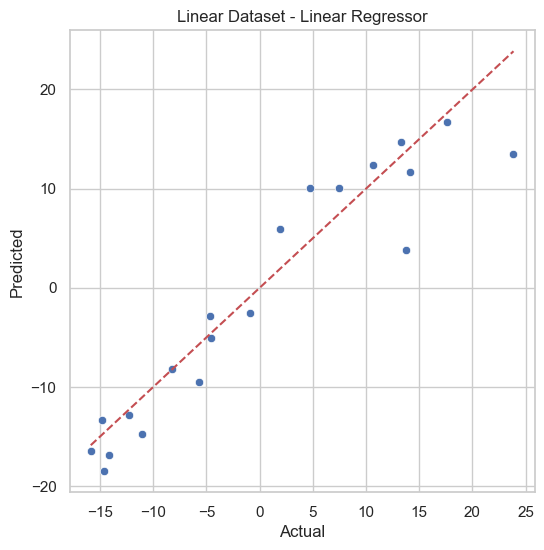

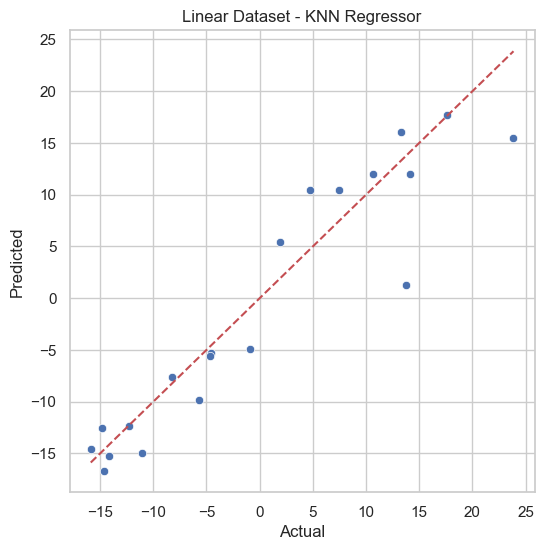

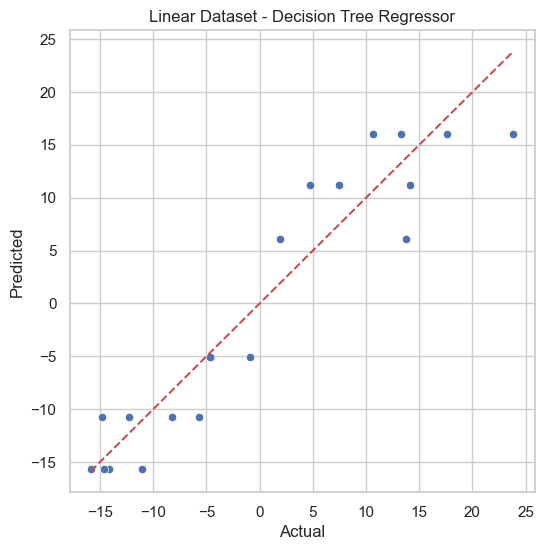

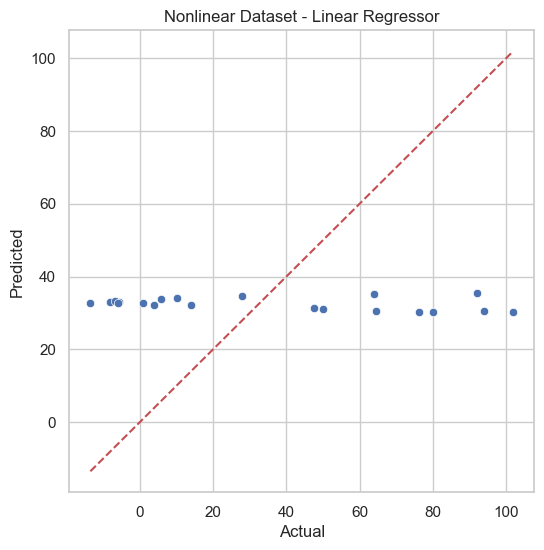

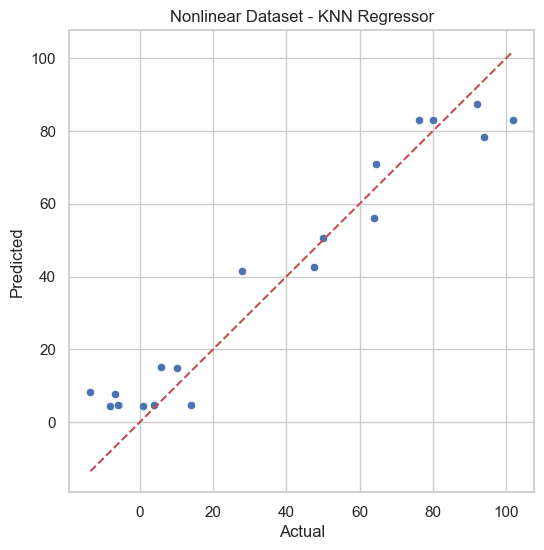

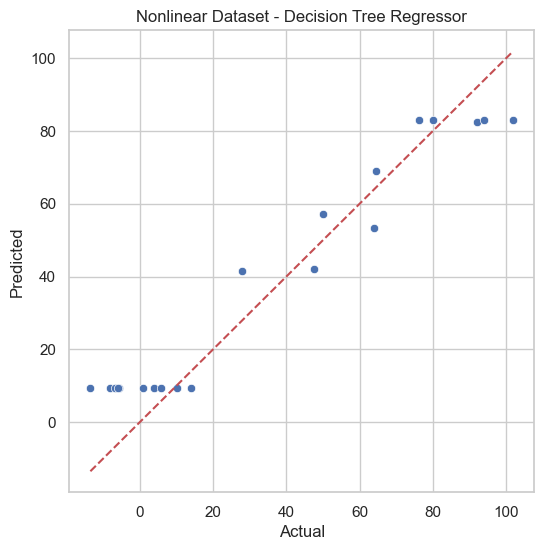

In [15]:
# Function to plot Actual vs Predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plotting for Linear Dataset
plot_actual_vs_predicted(y_test_linear, linear_linear.predict(X_test_linear), 'Linear Dataset - Linear Regressor')
plot_actual_vs_predicted(y_test_linear, knn_linear.predict(X_test_linear), 'Linear Dataset - KNN Regressor')
plot_actual_vs_predicted(y_test_linear, dt_linear.predict(X_test_linear), 'Linear Dataset - Decision Tree Regressor')

# Plotting for Nonlinear Dataset
plot_actual_vs_predicted(y_test_nonlinear, linear_nonlinear.predict(X_test_nonlinear), 'Nonlinear Dataset - Linear Regressor')
plot_actual_vs_predicted(y_test_nonlinear, knn_nonlinear.predict(X_test_nonlinear), 'Nonlinear Dataset - KNN Regressor')
plot_actual_vs_predicted(y_test_nonlinear, dt_nonlinear.predict(X_test_nonlinear), 'Nonlinear Dataset - Decision Tree Regressor')


In [17]:
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()


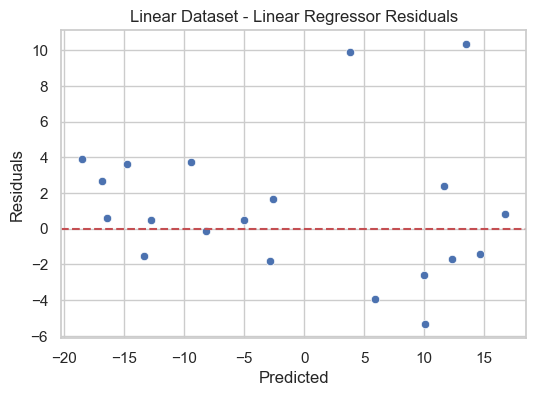

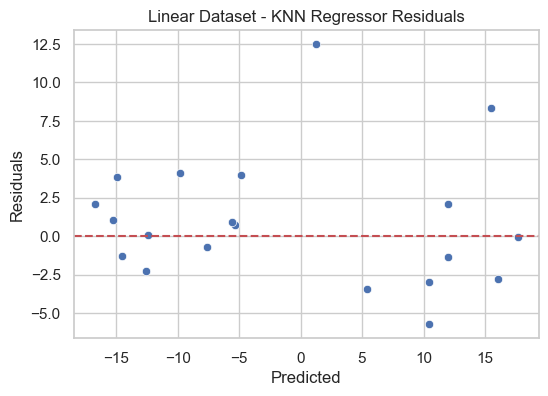

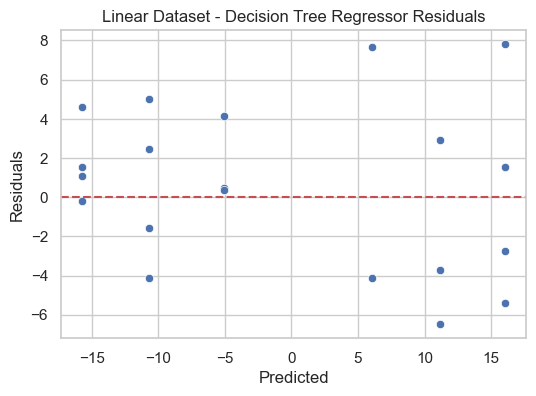

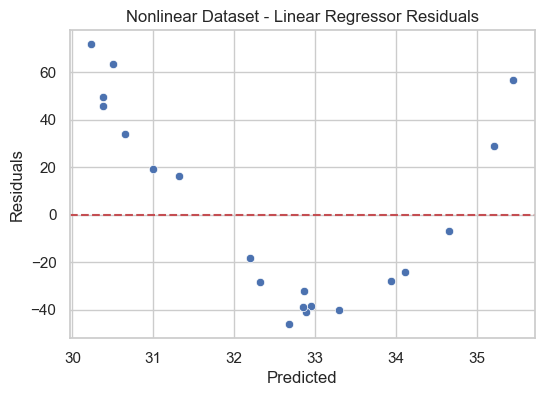

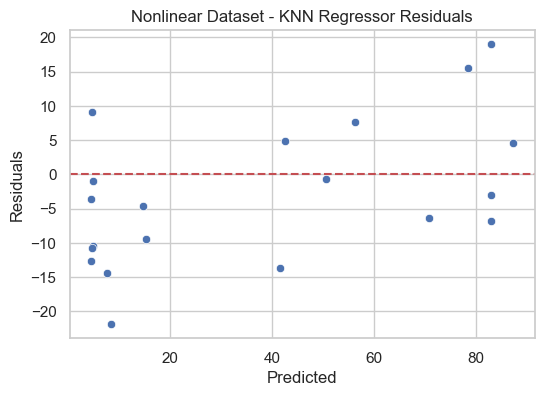

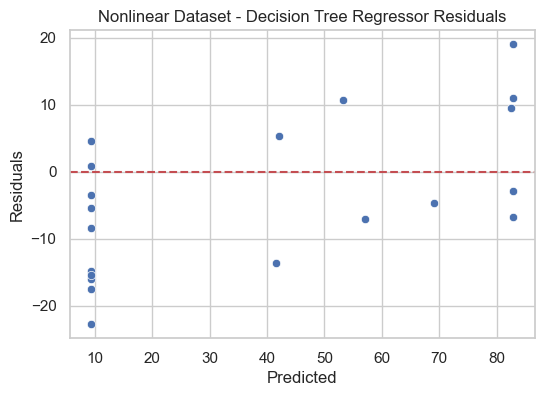

In [16]:
# Plotting residuals for Linear Dataset
plot_residuals(y_test_linear, linear_linear.predict(X_test_linear), 'Linear Dataset - Linear Regressor Residuals')
plot_residuals(y_test_linear, knn_linear.predict(X_test_linear), 'Linear Dataset - KNN Regressor Residuals')
plot_residuals(y_test_linear, dt_linear.predict(X_test_linear), 'Linear Dataset - Decision Tree Regressor Residuals')

# Plotting residuals for Nonlinear Dataset
plot_residuals(y_test_nonlinear, linear_nonlinear.predict(X_test_nonlinear), 'Nonlinear Dataset - Linear Regressor Residuals')
plot_residuals(y_test_nonlinear, knn_nonlinear.predict(X_test_nonlinear), 'Nonlinear Dataset - KNN Regressor Residuals')
plot_residuals(y_test_nonlinear, dt_nonlinear.predict(X_test_nonlinear), 'Nonlinear Dataset - Decision Tree Regressor Residuals')
    